In [77]:
import pandas as pd
cars = pd.read_csv('Cars93.csv')

# import the raw data

In [78]:
# clean the data & remove missing values
cars = cars.dropna()

In [79]:
# drop columns that are not categorical or numeric (I dropped some of the categorical ones too)
cars.drop(columns = ['Unnamed: 0','Origin','Make','AirBags','Manufacturer','Model','DriveTrain','Passengers','Man.trans.avail'],inplace=True)

In [80]:
# generate dummy variables for categorical
dummies = pd.get_dummies(cars['Type'])
cars = pd.concat([cars, dummies],axis=1)
cars.drop(columns = 'Type',inplace=True)

In [81]:
# split up target variable from main dataset
x = cars.drop(columns = 'MPG.highway')
y = cars['MPG.highway']

In [82]:
# create a test set
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = .75, random_state = 0
)

In [83]:
# train the model using linear regression

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(x_train,y_train)

In [84]:
# generate predictions on the test set

reg.predict(x_test)

array([42.93674782, 28.44996715, 26.96003624, 15.43854045, 38.57495732,
       32.09779122, 27.30172333, 26.76340505, 22.99532253, 16.64060067,
       35.96806573, 39.78201416, 20.50048756, 39.30576381, 32.59575233,
       31.09276374, 44.2414386 , 19.67643687, 49.10696643, 34.58141403,
       36.07034332, 18.22300119, 31.2287043 , 53.42707497, 15.69777653,
       31.22607932, 45.88389601, 18.12785179, 26.69658486, 29.26826588,
       29.67411344, 42.35646617, 41.13617248, 24.19569557, 20.39916595,
       41.19265425, 12.0656424 , 17.48578476, 41.92780134, 18.31795769,
       14.3911181 , 22.37250881, 21.47671593, 37.69184268, 40.49822315,
       12.36215285, 26.33284156, 43.56151816, 18.17656403, 35.39922651,
       28.99661295, 24.57952681, 35.1883183 , 35.30424094, 45.91170004,
       23.70133467, 28.3291851 , 31.33802614, 46.02217642, 36.75800521,
       22.9266018 , 35.17064496])

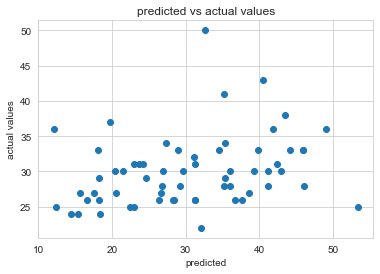

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style('whitegrid')

plt.scatter(x = reg.predict(x_test), y = y_test)
plt.title("predicted vs actual values")
plt.xlabel("predicted")
plt.ylabel("actual values")
plt.show()

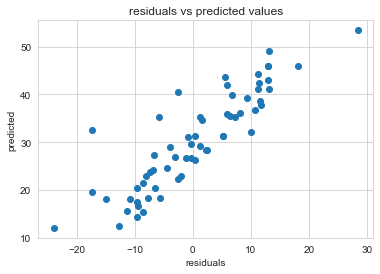

In [86]:

plt.scatter(x = (reg.predict(x_test) - y_test), y = reg.predict(x_test))
plt.title("residuals vs predicted values")
plt.xlabel("residuals")
plt.ylabel("predicted")
plt.show()


In [89]:
# print out the coefficient of determination of the model
reg.score(x_test,y_test)

-3.0345243265295645

In [105]:
# print out the model as an equation:
equation = f'y = {reg.intercept_} + '
for i, coefficient in enumerate(reg.coef_):
    equation = equation + f'{coefficient}x_{i+1} + '
equation = equation[:-2]
print(equation)

y = 33.504842790287036 + 0.7733216732277547x_1 + -0.16333119141598756x_2 + 0.028872023622391444x_3 + 0.9135117898243053x_4 + -6.0778659141626985x_5 + 11.390161465787711x_6 + -0.143686407323925x_7 + 0.012271683471238854x_8 + -0.022499910145297293x_9 + 1.20784061383222x_10 + 0.320307409991446x_11 + -0.5348003679364558x_12 + 0.10352950359764622x_13 + -0.005463607954616142x_14 + -0.9151112803204909x_15 + 0.23536947391519294x_16 + -0.011733590329475319x_17 + 5.2368546964259135x_18 + -2.623821985900815x_19 + -6.095957044849822x_20 + 7.186739080530475x_21 + -3.7038147462058193x_22 
